# Data Cleaning

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount GDrive's folders
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This code imports a library "os" that allows file navigation
import os
# This code sets the home directory
# Find your folder and put the path here as a string
os.chdir('/content/drive/MyDrive/Development/DSF/DSFC13 Sprint 1')

In [ ]:
# Create data frame
df = pd.read_csv("Data/cc_clean.csv")
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",31/08/1970,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28
2,4.140000e+18,M,Calapan,133893,Financial controller,23/07/1953,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,11/01/1954,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",31/07/1961,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50


In [ ]:
# Check data dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92432 entries, 0 to 92431
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cc_num          92432 non-null  float64
 1   gender          92432 non-null  object 
 2   city            92432 non-null  object 
 3   city_pop        92432 non-null  int64  
 4   job             92432 non-null  object 
 5   dob             92432 non-null  object 
 6   acct_num        92432 non-null  float64
 7   acct_num2       92432 non-null  int64  
 8   trans_num       92432 non-null  object 
 9   unix_time       92432 non-null  int64  
 10  category        85391 non-null  object 
 11  amt             92432 non-null  float64
 12  trans_datetime  92432 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 9.2+ MB


In [ ]:
# Check null rows
df.isnull().sum()

cc_num               0
gender               0
city                 0
city_pop             0
job                  0
dob                  0
acct_num             0
acct_num2            0
trans_num            0
unix_time            0
category          7041
amt                  0
trans_datetime       0
dtype: int64

In [ ]:
# Check if acct_num and acct_num2 are identical
identical_columns = df['acct_num'].equals(df['acct_num2'])

print("Are acct_num and acct_num2 identical?:", identical_columns)

Are acct_num and acct_num2 identical?: False


In [ ]:
# Group by credit card number and count unique account numbers
cc_acct_counts = df.groupby('cc_num')['acct_num'].nunique()

df[df['cc_num'] == 6.390000e+11]

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime
62,6.390000e+11,M,City of Calamba,454486,Management consultant,29/05/1958,4.340000e+11,434000000000,d06c7c63df75fce6c28be407443a18ec,1592619731,entertainment,1.37,2020-06-20 10:22:11
66,6.390000e+11,F,Dumaguete City,131377,"Accountant, chartered certified",12/01/1942,8.780000e+11,878000000000,a92398481ef9780e84cde741d2762837,1588128951,misc_net,131.21,2020-04-29 10:55:51
83,6.390000e+11,M,City of Calamba,454486,Management consultant,29/05/1958,4.340000e+11,434000000000,dbf40049aef7b275c8ec4ee60865fbf2,1611713294,NaN,26.95,2021-01-27 10:08:14
185,6.390000e+11,M,City of Calamba,454486,Management consultant,29/05/1958,4.340000e+11,434000000000,8ab5050935ee713afd6d4f936982490e,1579665502,grocery_pos,84.24,2020-01-22 11:58:22
209,6.390000e+11,M,City of Calamba,454486,Management consultant,29/05/1958,4.340000e+11,434000000000,70f3d772a54a22036376847d83c809cf,1624070520,entertainment,104.24,2021-06-19 10:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92330,6.390000e+11,M,City of Calamba,454486,Management consultant,29/05/1958,4.340000e+11,434000000000,e70d9a1ea361c4f369919c2befc178cc,1626602791,grocery_pos,106.47,2021-07-18 18:06:31
92357,6.390000e+11,M,City of Calamba,454486,Management consultant,29/05/1958,4.340000e+11,434000000000,7933f15ee2c35d452cd9353026afdb0e,1597658685,food_dining,55.60,2020-08-17 18:04:45
92369,6.390000e+11,F,Dumaguete City,131377,"Accountant, chartered certified",12/01/1942,8.780000e+11,878000000000,0c4e27347d30ab76d5649c0dffc2a073,1630819654,shopping_pos,7.44,2021-09-05 13:27:34
92370,6.390000e+11,M,City of Calamba,454486,Management consultant,29/05/1958,4.340000e+11,434000000000,7d5fec0a662d8d9e9197b39afbac0744,1607723740,personal_care,83.62,2020-12-12 05:55:40


In [ ]:
# Get the total number of records
total_records = len(df)

# Check the number of unique values for each potential identifier column
unique_cc_num = df['cc_num'].nunique()
unique_trans_num = df['trans_num'].nunique()
unique_acct_num = df['acct_num'].nunique()

print(f"Total Records: {total_records}")
print(f"Unique Credit Card Numbers (cc_num): {unique_cc_num}")
print(f"Unique Transaction Numbers (trans_num): {unique_trans_num}")
print(f"Unique Account Numbers (acct_num): {unique_acct_num}")

# Check for any other columns that might be unique
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values == total_records:
        print(f"{column} is a unique identifier")


Total Records: 92432
Unique Credit Card Numbers (cc_num): 69
Unique Transaction Numbers (trans_num): 92432
Unique Account Numbers (acct_num): 94
trans_num is a unique identifier


# Data Transformation

In [ ]:
# Convert trans_datetime to pd.to_datetime
df['trans_datetime'] = pd.to_datetime(df['trans_datetime'])
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",31/08/1970,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28
2,4.140000e+18,M,Calapan,133893,Financial controller,23/07/1953,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,11/01/1954,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",31/07/1961,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50


In [ ]:
# Get the minimum and maximum dates
min_date = df['trans_datetime'].min()
max_date = df['trans_datetime'].max()

# Get the unique years covered by the data
years_covered = df['trans_datetime'].dt.year.unique()

print("Date Range: ", min_date, " to ", max_date)
print("Years Covered: ", years_covered)

Date Range:  2020-01-01 08:06:15  to  2021-12-07 07:50:42
Years Covered:  [2020 2021]


For recency analysis, we need to know how much days have passed since the transaction, assuming current date is Jan 1, 2022.

In [ ]:
# Define the current date
current_date = pd.to_datetime('2022-01-01')

# Calculate the elapsed days
df['elapsed_days'] = (current_date - df['trans_datetime']).dt.days

df.head()


,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",31/08/1970,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579
2,4.140000e+18,M,Calapan,133893,Financial controller,23/07/1953,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,11/01/1954,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",31/07/1961,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,532


In [ ]:
# Change age dtype to date time
df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y')

#Add the age column
df['age'] = (current_date - df['dob']).dt.days // 365.25
df['age'] = df['age'].astype('int')
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690,63
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579,51
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642,68
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459,67
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,532,60


In [ ]:
# Add time of day

def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['trans_datetime'].dt.hour.apply(classify_time_of_day)
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age,time_of_day
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690,63,Afternoon
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579,51,Afternoon
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642,68,Afternoon
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459,67,Afternoon
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,532,60,Afternoon


In [ ]:
# Add season
def classify_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (month <= 3 and (month < 3 or (month == 3 and day <= 19))):
        return 'Winter'
    elif (month == 3 and day >= 20) or (month <= 6 and (month < 6 or (month == 6 and day <= 20))):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month <= 9 and (month < 9 or (month == 9 and day <= 21))):
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to the entire trans_datetime column
df['season'] = df['trans_datetime'].apply(classify_season)
df.head()


,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age,time_of_day,season
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690,63,Afternoon,Winter
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579,51,Afternoon,Spring
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642,68,Afternoon,Spring
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459,67,Afternoon,Fall
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,532,60,Afternoon,Summer


In [ ]:
# Check value count for age
df['age'].value_counts()

age
72    10461
55     5919
51     5894
61     5879
64     5213
78     3936
66     3895
63     3288
57     3286
60     3277
53     3275
79     3260
58     2646
91     2614
67     2599
73     1987
68     1977
74     1966
76     1964
80     1961
65     1955
59     1949
56     1330
69     1323
54     1323
71     1323
83     1320
70     1319
62     1312
87     1307
52      679
95      675
92      657
86      657
93        6
Name: count, dtype: int64

In [ ]:
# Create age segment
def age_segment(age):
    if 50 <= age <= 59:
        return 'Middle-aged Adults'
    elif 60 <= age <= 69:
        return 'Pre-Retirees'
    elif 70 <= age <= 79:
        return 'Young Seniors'
    else:
        return 'Older Seniors'

df['age_segment'] = df['age'].apply(age_segment)
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age,time_of_day,season,age_segment
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690,63,Afternoon,Winter,Pre-Retirees
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579,51,Afternoon,Spring,Middle-aged Adults
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642,68,Afternoon,Spring,Pre-Retirees
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459,67,Afternoon,Fall,Pre-Retirees
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,532,60,Afternoon,Summer,Pre-Retirees


In [ ]:
# Check values for age segment created
df['age_segment'].value_counts()

age_segment
Pre-Retirees          30718
Middle-aged Adults    26301
Young Seniors         26216
Older Seniors          9197
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92432 entries, 0 to 92431
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cc_num          92432 non-null  float64       
 1   gender          92432 non-null  object        
 2   city            92432 non-null  object        
 3   city_pop        92432 non-null  int64         
 4   job             92432 non-null  object        
 5   dob             92432 non-null  datetime64[ns]
 6   acct_num        92432 non-null  float64       
 7   acct_num2       92432 non-null  int64         
 8   trans_num       92432 non-null  object        
 9   unix_time       92432 non-null  int64         
 10  category        85391 non-null  object        
 11  amt             92432 non-null  float64       
 12  trans_datetime  92432 non-null  datetime64[ns]
 13  elapsed_days    92432 non-null  int64         
 14  age             92432 non-null  int64         
 15  ti

# Using RFM


First, create a per-customer table using transactions done in 2021

In [ ]:
# Check shape of data
df.shape

(92432, 18)

In [ ]:
# Sort by elapsed days
df.sort_values(by='elapsed_days')

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age,time_of_day,season,age_segment
14026,5.200000e+15,M,Palayan City,41041,Emergency planning/management officer,1960-09-19,4.200000e+11,420000000000,71721a7da877f1ae113fc64c199fd7d0,1638820232,home,17.41,2021-12-07 03:50:32,24,61,Night,Fall,Pre-Retirees
13590,4.400000e+15,M,Dagupan City,171271,Camera operator,1949-04-24,7.530000e+11,753000000000,43aee74ebd7b675d19a35558213b6c57,1638815211,home,62.78,2021-12-07 02:26:51,24,72,Night,Fall,Young Seniors
51961,4.010000e+12,M,Malaybalay,174625,Tourist information centre manager,1966-01-11,4.390000e+11,439000000000,cc294b80f7c369827d585be616b9460c,1638807148,home,65.75,2021-12-07 00:12:28,24,55,Night,Fall,Middle-aged Adults
53832,4.870000e+15,M,San Fernando,121812,"Education officer, museum",1964-07-18,8.630000e+11,863000000000,f79f19c324cad2f7beae848b1db5d77c,1638812251,kids_pets,180.47,2021-12-07 01:37:31,24,57,Night,Fall,Middle-aged Adults
50600,4.060000e+15,M,Valenzuela,620422,Operational investment banker,1963-12-06,2.310000e+11,231000000000,03973a382d240a21f94d5731b58c895f,1638809311,food_dining,41.72,2021-12-07 00:48:31,24,58,Night,Fall,Middle-aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70777,4.400000e+15,M,Dagupan City,171271,Camera operator,1949-04-24,7.530000e+11,753000000000,03e0abffd34f88172ca013b4065f9efc,1577892802,home,73.26,2020-01-01 23:33:22,730,72,Night,Winter,Young Seniors
54639,4.090000e+15,M,Muntinlupa City,504509,Industrial/product designer,1938-04-12,7.220000e+11,722000000000,a47208d4195a40ce4486763084ca52eb,1577880672,health_fitness,32.42,2020-01-01 20:11:12,730,83,Evening,Winter,Older Seniors
71370,5.040000e+11,M,Naga City,196003,"Designer, fashion/clothing",1943-02-03,9.020000e+11,902000000000,db4adda92dd758978fd3d0ec7f340d98,1577876863,entertainment,220.26,2020-01-01 19:07:43,730,78,Evening,Winter,Young Seniors
11444,6.550000e+15,M,Malaybalay,174625,English as a foreign language teacher,1948-12-31,5.810000e+11,581000000000,12f70d093fb95cc913507ceb19f13db6,1577893244,health_fitness,125.74,2020-01-01 23:40:44,730,73,Night,Winter,Young Seniors


### Recency


In [ ]:
# Get days since last transaction of each customer first, and include gender tag
# last transaction min of elapsed time
# groupby + trick to convert back to dataframe
rec_df = df.groupby(['acct_num'])['elapsed_days'].min().to_frame(name='recency').reset_index()
rec_df

,acct_num,recency
0,1.240000e+11,24
1,1.380000e+11,401
2,1.690000e+11,141
3,1.700000e+11,24
4,2.010000e+11,25
...,...,...
89,9.690000e+11,26
90,9.710000e+11,25
91,9.890000e+11,25
92,9.940000e+11,25


Using this, create a system to assign a recency score to the `recency` column.

**More recent transaction => Higher score**

* 1 - low score
* 2 - medium score
* 3 - high score

In [ ]:
def assign_score_recency(x):
  if x<=30: # last transaction is within last month
    return 3
  elif 30<x<90: # within last quarter
    return 2
  else: #older than last quarter
    return 1

In [ ]:
rec_df['recency_score'] = rec_df['recency'].map(assign_score_recency)
rec_df

,acct_num,recency,recency_score
0,1.240000e+11,24,3
1,1.380000e+11,401,1
2,1.690000e+11,141,1
3,1.700000e+11,24,3
4,2.010000e+11,25,3
...,...,...,...
89,9.690000e+11,26,3
90,9.710000e+11,25,3
91,9.890000e+11,25,3
92,9.940000e+11,25,3


### Frequency

In [ ]:
# Get transaction frequency of each customer first
# groupby + trick to convert back to dataframe
freq_df = df.groupby(['acct_num']).size().to_frame(name='frequency').reset_index()
freq_df

,acct_num,frequency
0,1.240000e+11,1950
1,1.380000e+11,6
2,1.690000e+11,9
3,1.700000e+11,1956
4,2.010000e+11,662
...,...,...
89,9.690000e+11,648
90,9.710000e+11,1950
91,9.890000e+11,655
92,9.940000e+11,1321


Using pandas method `pd.qcut` (quantile cut), classify and score the customers based on their frequency

**More frequent transactions => Higher score**

* 1- low score
* 2- medium score
* 3- high score

In [ ]:
freq_df['frequency'].describe()

count      94.000000
mean      983.319149
std       742.492710
min         6.000000
25%       182.500000
50%       666.500000
75%      1940.000000
max      1985.000000
Name: frequency, dtype: float64

In [ ]:
freq_df['frequency_score'] = pd.qcut(freq_df['frequency'], q=3, labels=[1, 2, 3]).astype(int)
freq_df

,acct_num,frequency,frequency_score
0,1.240000e+11,1950,3
1,1.380000e+11,6,1
2,1.690000e+11,9,1
3,1.700000e+11,1956,3
4,2.010000e+11,662,2
...,...,...,...
89,9.690000e+11,648,1
90,9.710000e+11,1950,3
91,9.890000e+11,655,1
92,9.940000e+11,1321,3


In [ ]:
freq_df['frequency_score'].value_counts()

frequency_score
1    35
3    31
2    28
Name: count, dtype: int64

### Monetary value
>Q: On average, how much is the total spending of each customer per gender?

In [ ]:
# Get total spending of each customer first
# groupby + trick to convert back to dataframe
mv_df = df.groupby(['acct_num'])['amt'].sum().to_frame(name='total_amt').reset_index()
mv_df

,acct_num,total_amt
0,1.240000e+11,128213.47
1,1.380000e+11,3932.55
2,1.690000e+11,2814.60
3,1.700000e+11,137459.29
4,2.010000e+11,48026.33
...,...,...
89,9.690000e+11,42247.66
90,9.710000e+11,128953.65
91,9.890000e+11,46164.21
92,9.940000e+11,84020.15


Using pandas method `pd.qcut` (quantile cut), classify and score the customers based on their monetary value

**Larger total transaction amts => Higher score**

* 1- low score
* 2- medium score
* 3- high score

In [ ]:
mv_df['monetary_score'] = pd.qcut(mv_df['total_amt'], q=3, labels=[1, 2, 3]).astype(int)
mv_df

,acct_num,total_amt,monetary_score
0,1.240000e+11,128213.47,3
1,1.380000e+11,3932.55,1
2,1.690000e+11,2814.60,1
3,1.700000e+11,137459.29,3
4,2.010000e+11,48026.33,2
...,...,...,...
89,9.690000e+11,42247.66,1
90,9.710000e+11,128953.65,3
91,9.890000e+11,46164.21,2
92,9.940000e+11,84020.15,2


### Total RFM score
To compute the total score, we need to


1.   Merge the recency, frequency, and monetary value tables together
2.   Add the scores to a column `rfm_score`



In [ ]:
# First, merge rec_df and freq_df using pd.merge
rfm_df = pd.merge(rec_df, freq_df, on=['acct_num'], how='inner')
rfm_df.head()

,acct_num,recency,recency_score,frequency,frequency_score
0,1.240000e+11,24,3,1950,3
1,1.380000e+11,401,1,6,1
2,1.690000e+11,141,1,9,1
3,1.700000e+11,24,3,1956,3
4,2.010000e+11,25,3,662,2


In [ ]:
# check lengths to see if we did merge correctly
print(len(rec_df))
print(len(freq_df))
print(len(rfm_df))

94
94
94


In [ ]:
# Then merge `mv_df` to `rfm_df`
rfm_df = pd.merge(rfm_df, mv_df, on=['acct_num'], how='inner')
rfm_df.head()

,acct_num,recency,recency_score,frequency,frequency_score,total_amt,monetary_score
0,1.240000e+11,24,3,1950,3,128213.47,3
1,1.380000e+11,401,1,6,1,3932.55,1
2,1.690000e+11,141,1,9,1,2814.60,1
3,1.700000e+11,24,3,1956,3,137459.29,3
4,2.010000e+11,25,3,662,2,48026.33,2


In [ ]:
# check lengths to see if we did merge correctly
print(len(mv_df))
print(len(rfm_df))

94
94


In [ ]:
# check lengths
print(len(rec_df))
print(len(freq_df))
print(len(rfm_df))
print(len(mv_df))
print(len(rfm_df))

94
94
94
94
94


Add up the scores and store in column `rfm_score`

In [ ]:
rfm_df['rfm_score'] = rfm_df['recency_score'] + rfm_df['frequency_score'] +rfm_df['monetary_score']
rfm_df.head()

,acct_num,recency,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score
0,1.240000e+11,24,3,1950,3,128213.47,3,9
1,1.380000e+11,401,1,6,1,3932.55,1,3
2,1.690000e+11,141,1,9,1,2814.60,1,3
3,1.700000e+11,24,3,1956,3,137459.29,3,9
4,2.010000e+11,25,3,662,2,48026.33,2,7


In [ ]:
# Check value counts of each rfm score
rfm_df['rfm_score'].value_counts()

rfm_score
9    26
3    22
7    21
8    10
6     7
5     7
4     1
Name: count, dtype: int64

Aggregate rfm_score

In [ ]:
# Check mean of rfm & count
rfm_df.groupby('rfm_score').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'total_amt': ['mean', 'count']
}).round(1)

recency frequency total_amt      
             mean      mean      mean count
rfm_score                                  
3           299.6       8.6    5144.5    22
4            88.0      22.0    6274.2     1
5            25.3     562.4   36403.7     7
6            24.9     654.4   45512.7     7
7            24.7     968.8   67484.8    21
8            24.8    1309.6   93693.2    10
9            24.5    1933.1  132425.0    26

In [ ]:
# Use RFM score to group customers into Gold, Silver and Bronze segments.
# Define the segmentation function
def segment_me(df):
    if df['rfm_score'] >= 8:
        return 'Gold'
    elif df['rfm_score'] >= 4:
        return 'Silver'
    else:
        return 'Bronze'

# Apply the segmentation function
rfm_df['General_Segment'] = rfm_df.apply(segment_me, axis=1)

# Group by the new segment and calculate the mean and count for Recency, Frequency, and MonetaryValue
segmentation_summary = rfm_df.groupby('General_Segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'total_amt': ['mean', 'count']
}).round(1)
segmentation_summary




recency frequency total_amt      
                   mean      mean      mean count
General_Segment                                  
Bronze            299.6       8.6    5144.5    22
Gold               24.6    1759.9  121666.2    36
Silver             26.6     802.4   55468.6    36

In [ ]:
# Assuming segmentation_summary is your grouped and aggregated DataFrame
segmentation_summary.columns = ['_'.join(col).strip() for col in segmentation_summary.columns.values]
segmentation_summary.reset_index(inplace=True)

# Rename columns to make them more readable
segmentation_summary.rename(columns={
    'recency_mean': 'recency',
    'frequency_mean': 'frequency',
    'total_amt_mean': 'total_amt',
    'total_amt_count': 'count'
}, inplace=True)

# Now segmentation_summary is a DataFrame suitable for plotting
segmentation_summary

,General_Segment,recency,frequency,total_amt,count
0,Bronze,299.6,8.6,5144.5,22
1,Gold,24.6,1759.9,121666.2,36
2,Silver,26.6,802.4,55468.6,36


<ipython-input-47-8cb896112adf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='General_Segment', y='recency', data=segmentation_summary, palette='viridis')
<ipython-input-47-8cb896112adf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='General_Segment', y='frequency', data=segmentation_summary, palette='viridis')
<ipython-input-47-8cb896112adf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='General_Segment', y='total_amt', data=segmentation_summary, palette='viridis')
<ipython-input-47-8cb896112adf>:27: FutureWarning: 

Passi

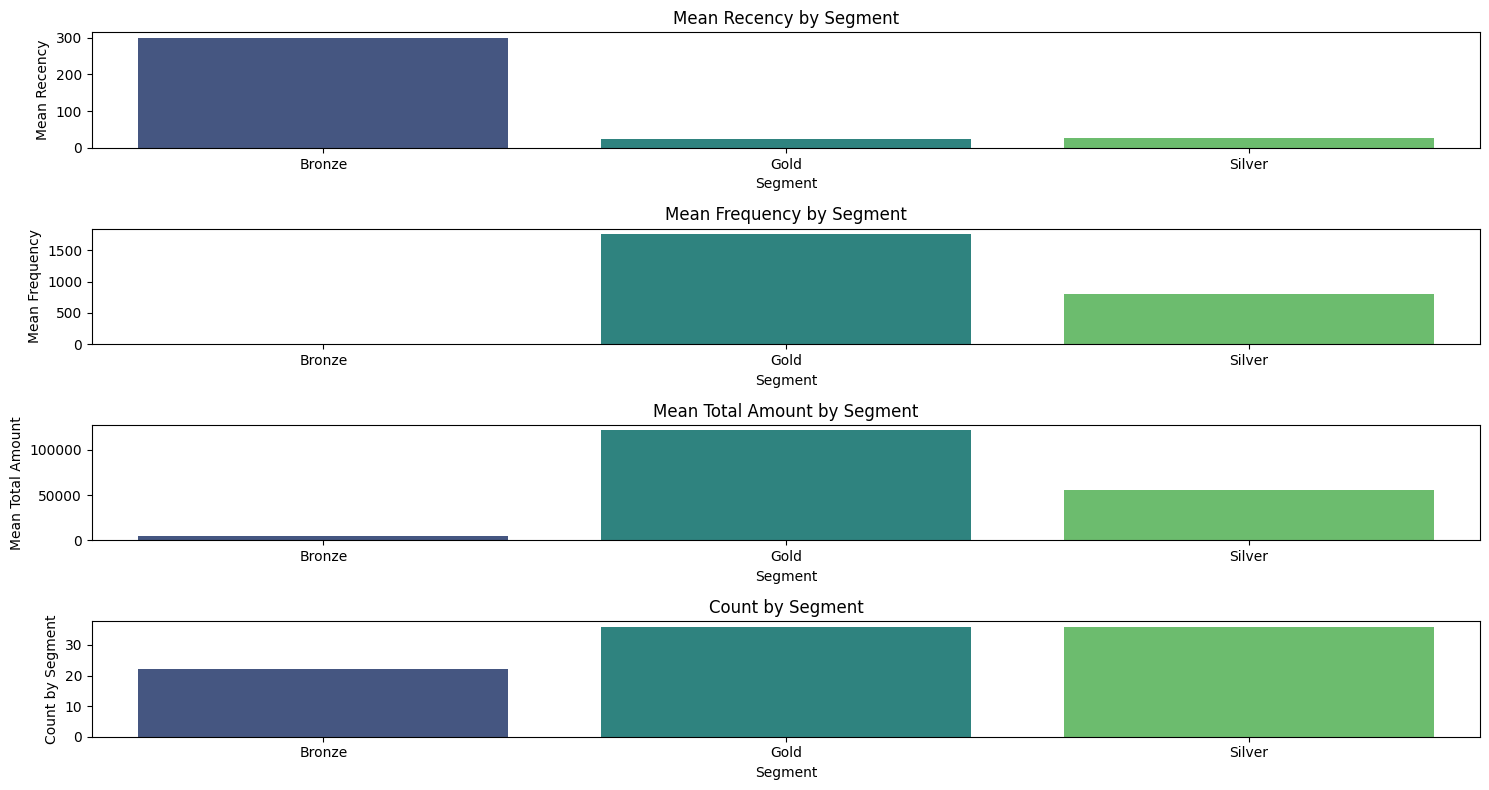

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Plot recency
plt.subplot(4, 1, 1)
sns.barplot(x='General_Segment', y='recency', data=segmentation_summary, palette='viridis')
plt.title('Mean Recency by Segment')
plt.xlabel('Segment')
plt.ylabel('Mean Recency')

# Plot frequency
plt.subplot(4, 1, 2)
sns.barplot(x='General_Segment', y='frequency', data=segmentation_summary, palette='viridis')
plt.title('Mean Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Mean Frequency')

# Plot total amount
plt.subplot(4, 1, 3)
sns.barplot(x='General_Segment', y='total_amt', data=segmentation_summary, palette='viridis')
plt.title('Mean Total Amount by Segment')
plt.xlabel('Segment')
plt.ylabel('Mean Total Amount')

# Plot total amount
plt.subplot(4, 1, 4)
sns.barplot(x='General_Segment', y='count', data=segmentation_summary, palette='viridis')
plt.title('Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count by Segment')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()